In [11]:
%pip install seaborn

In [12]:
%pip install joblib

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [15]:
df = pd.read_csv('car_insurance.csv')
df.head(10)

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55
5,38,13,2,11,1998,27,494.75
6,56,37,3,14,1998,27,485.60
7,36,18,1,19,2000,25,492.35
8,40,10,4,14,2011,14,497.10
9,28,10,5,12,2022,3,499.80


In [16]:
df.isnull().sum()

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

In [17]:
X = df.drop(columns = 'Insurance Premium ($)')
X

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age
0,56,32,4,17,2002,23
1,46,19,0,21,2025,0
2,32,11,4,15,2020,5
3,60,0,4,19,1991,34
4,25,7,0,13,2005,20
...,...,...,...,...,...,...
995,23,5,3,22,2020,5
996,43,8,3,17,2023,2
997,21,3,5,19,1998,27
998,36,18,1,23,2011,14


In [18]:
y = df['Insurance Premium ($)']
y

0      488.35
1      486.15
2      497.55
3      498.35
4      495.55
        ...  
995    500.00
996    494.55
997    506.05
998    491.45
999    492.80
Name: Insurance Premium ($), Length: 1000, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
train_data = X_train.join(y_train)

In [22]:
train_data.corr()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
Driver Age,1.000000,0.615438,0.066464,0.078797,-0.009206,0.009206,-0.767190
Driver Experience,0.615438,1.000000,0.039156,0.008509,-0.010278,0.010278,-0.810888
Previous Accidents,0.066464,0.039156,1.000000,-0.013056,-0.050288,0.050288,0.389870
Annual Mileage (x1000 km),0.078797,0.008509,-0.013056,1.000000,0.003994,-0.003994,-0.010301
Car Manufacturing Year,-0.009206,-0.010278,-0.050288,0.003994,1.000000,-1.000000,-0.188102
Car Age,0.009206,0.010278,0.050288,-0.003994,-1.000000,1.000000,0.188102
Insurance Premium ($),-0.767190,-0.810888,0.389870,-0.010301,-0.188102,0.188102,1.000000


<Axes: >

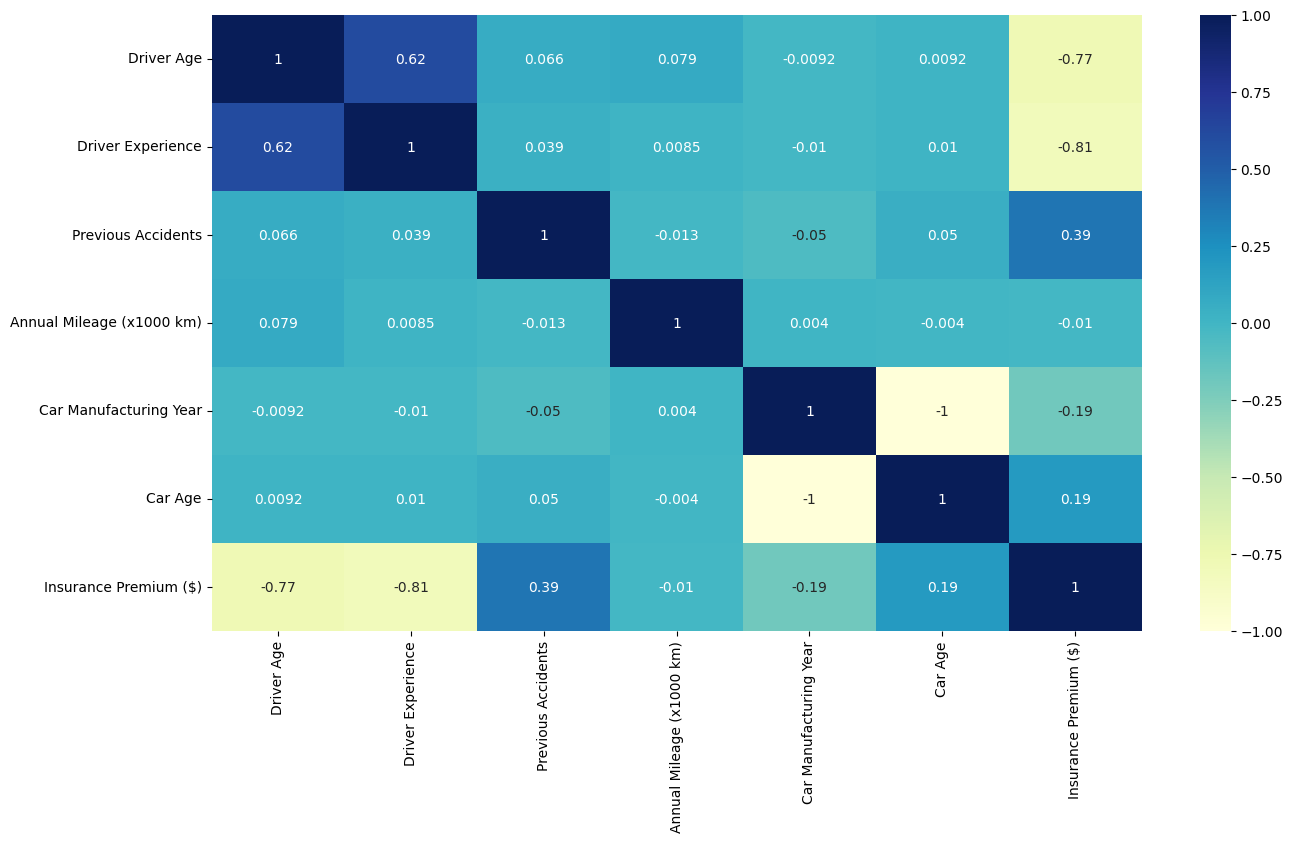

In [23]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot= True, cmap="YlGnBu")

<Axes: xlabel='Annual Mileage (x1000 km)', ylabel='Insurance Premium ($)'>

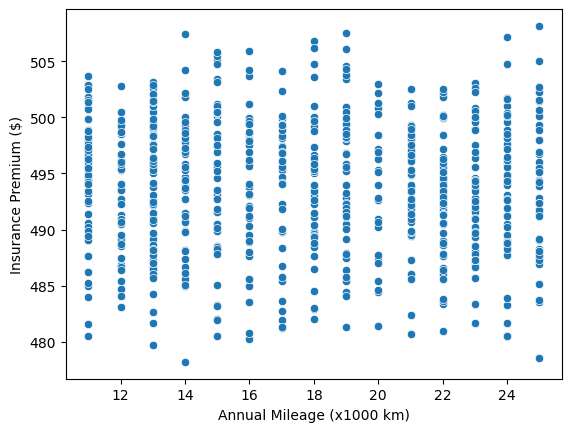

In [24]:
sns.scatterplot(x='Annual Mileage (x1000 km)', y='Insurance Premium ($)', data=train_data)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
lr.score(X_test, y_test)

1.0

In [27]:
c = lr.intercept_
c

np.float64(601.2499999999989)

In [28]:
m = lr.coef_
m

array([-0.2 , -0.3 ,  1.5 ,  0.05, -0.05,  0.05])

In [29]:
y_pred_train = lr.predict(X_train)

Text(0, 0.5, 'Predicted Insurance Premium')

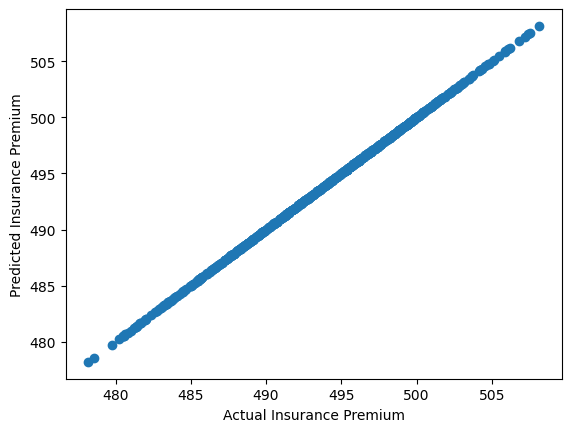

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Insurance Premium')
plt.ylabel('Predicted Insurance Premium')

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_train, y_pred_train)

1.0

Text(0, 0.5, 'Predicted Insurance Premium')

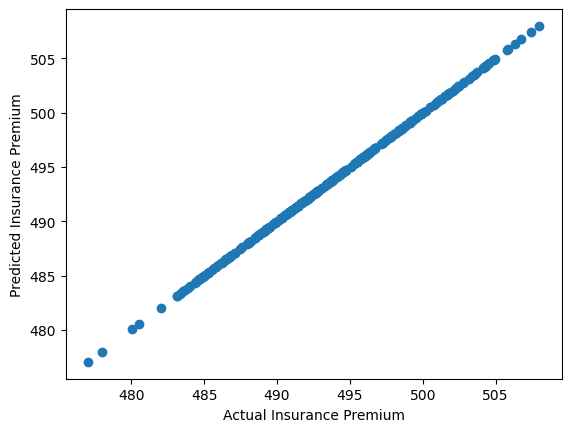

In [32]:
y_pred_test = lr.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Insurance Premium')
plt.ylabel('Predicted Insurance Premium')

In [33]:
r2_score(y_test, y_pred_test)

1.0

In [34]:
mean_absolute_error(y_test, y_pred_test)

1.1558161835030963e-14

In [35]:
mean_squared_error(y_test, y_pred_test)

6.570054344496704e-28

In [36]:
joblib.dump(lr, 'lin_model')

['lin_model']